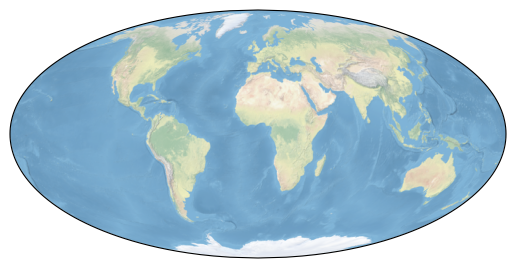

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
plt.show()

In [2]:
import xarray as xr

# the line above is necessary for getting 
# your plot embedded within the notebook


dset = xr.open_dataset("data/agosto.nc")
print(dset)

c:\Users\richa\anaconda3\envs\cartaenv\lib\site-packages\xarray\backends\plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2022-08-01
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-11-13 16:51:37 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...


In [3]:
print(dset['tp'])

<xarray.DataArray 'tp' (time: 1, latitude: 721, longitude: 1440)>
[1038240 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2022-08-01
Attributes:
    units:      m
    long_name:  Total precipitation


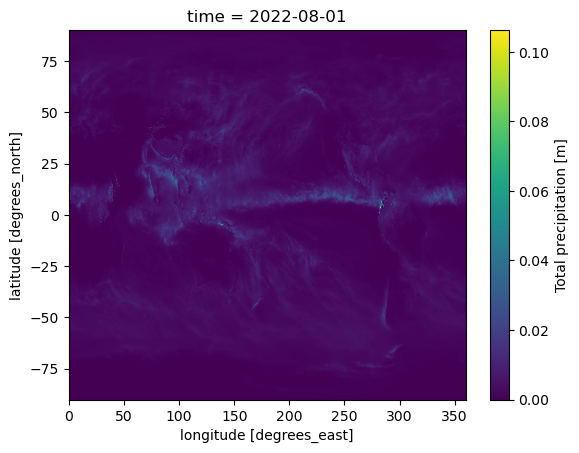

In [4]:
dset['tp'].plot()

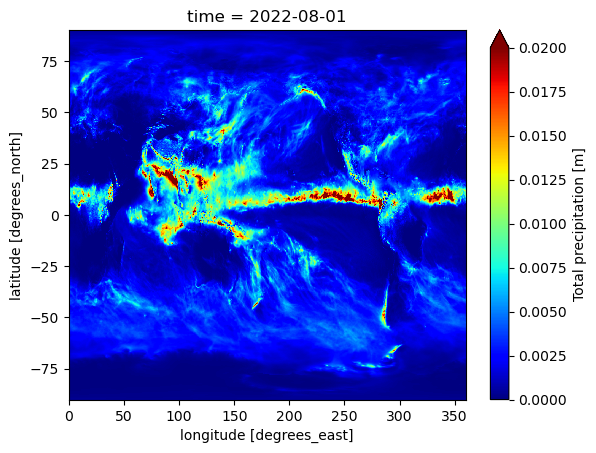

In [5]:
dset['tp'].plot(cmap='jet', vmax=0.02)

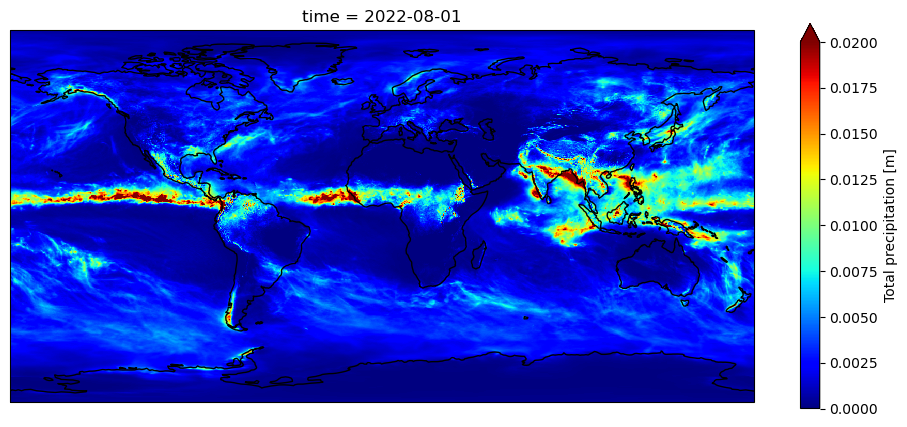

In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=[12,5])

# 111 means 1 row, 1 col and index 1
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=0))

dset['tp'].plot(ax=ax, vmax=0.02, cmap='jet',
                   transform=ccrs.PlateCarree())
ax.coastlines()

plt.show()

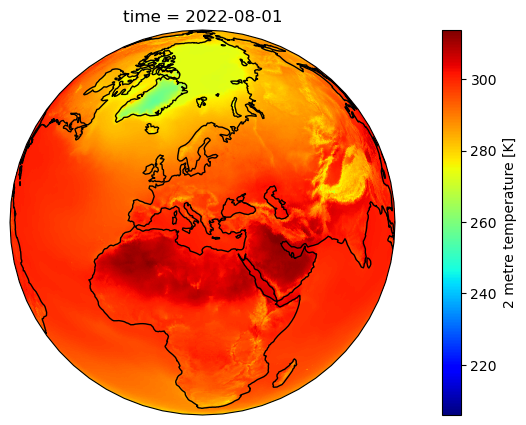

In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=[12,5])

# 111 means 1 row, 1 col and index 1
ax = fig.add_subplot(111, projection = ccrs.Orthographic(central_longitude=20, central_latitude=40))

dset['t2m'].plot(ax=ax,  cmap='jet',
                   transform=ccrs.PlateCarree())
ax.coastlines()

plt.show()

c:\Users\richa\anaconda3\envs\cartaenv\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\richa\anaconda3\envs\cartaenv\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


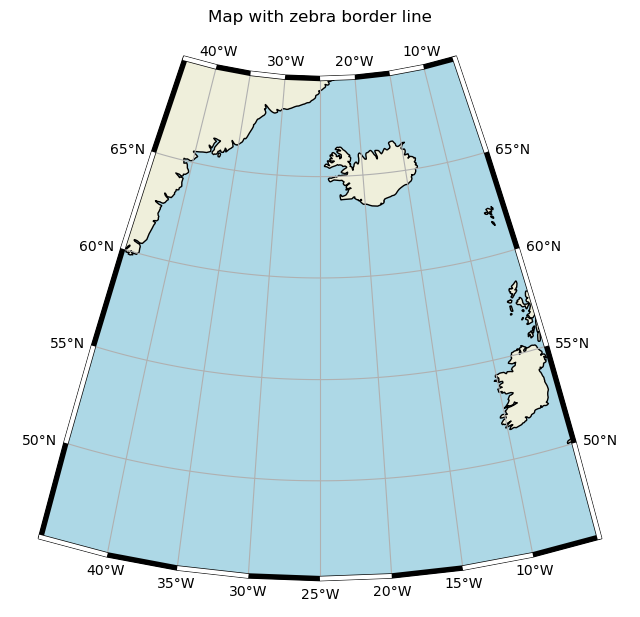

In [8]:
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as patches

# The lat-long projection
noProj = ccrs.PlateCarree(central_longitude=0)
# The projection of the map:
myProj = ccrs.Orthographic(central_longitude=-25, central_latitude=58)
myProj._threshold = myProj._threshold/40.  #for higher precision plot

fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(1, 1, 1, projection=myProj)

# Zebra-border-line segments ...
#  four edges on separate lines of code
# 1: lower edge: Left - Right
# 2: Right edge: Bottom - Top
# 3: Upper edge: Right - Left
# 4: Left edge: Top - Bottom
[ax_hdl] = ax.plot(
    [
        -45, -40, -35, -30, -25, -20, -15, -10, -5,
        -5,-5,-5,-5,-5,
        -10,-15,-20,-25,-30,-35,-40,-45,
        -45, -45, -45, -45, -45
    ],
    [
        45, 45, 45, 45, 45, 45, 45, 45, 45,
        50, 55, 60, 65, 70,
        70,70,70,70,70,70,70,70,
        65, 60, 55, 50, 45 
    ],
    color='black', linewidth=0.5,
    transform=noProj)
tx_path = ax_hdl._get_transformed_path()
path_in_data_coords, _ = tx_path.get_transformed_path_and_affine()
polygon1s = mpath.Path( path_in_data_coords.vertices)
vcode = [1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1]  #Path-code
polygon1v = mpath.Path( path_in_data_coords.vertices, vcode)

ax.set_boundary(polygon1s) #masks-out unwanted part of the plot

# Zebra-pattern creation
# The pattern line is created from 2 layers
#  lower layer: thicker, black solid line
#  top layer: thinner, dashed white line
patch1s = patches.PathPatch(polygon1s, facecolor='none', ec="black", lw=7, zorder=100)
patch1v = patches.PathPatch(polygon1v, facecolor='none', ec="white", lw=6, zorder=101)
ax.add_patch(patch1s)
ax.add_patch(patch1v)

ax.gridlines(draw_labels=True, x_inline=False, y_inline=False)
ax.add_feature(cartopy.feature.OCEAN, linewidth=.3, color='lightblue')
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
ax.title.set_text("Map with zebra border line")
plt.show()